# ChEMBL data preparation

Fetching and inspecting ChEMBL compound data that will be used throughout the project.

## Imports

In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True  #set this to False if you want PNGs instead of SVGs

from chembl_webresource_client.new_client import new_client

In [3]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)

## Tests using the ChEMBL python client

Good for querying and searching ChEMBL programmatically. Not fast to download all data.

In [2]:
molecule = new_client.molecule
light_molecules = molecule.filter(molecule_properties__mw_freebase__lte=300)

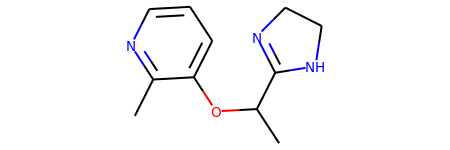

In [9]:
# load and visualize an example compound
mol_smi = light_molecules[53589]["molecule_structures"]["canonical_smiles"]
mol = Chem.MolFromSmiles(mol_smi)
mol

In [10]:
# check that SMILES come in a canonical format
mol_smi

'Cc1ncccc1OC(C)C1=NCCN1'

In [11]:
Chem.CanonSmiles(mol_smi)

'Cc1ncccc1OC(C)C1=NCCN1'

## Load all ChEMBL compounds

All ChEMBL compunds have been downloaded and stored in a .zip file.

In [4]:
molecules = pd.read_csv("data/chembl_compunds.zip", compression="zip", sep=";", na_values="None")
molecules.head()

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,HBA,HBD,#RO5 Violations,#Rotatable Bonds,Passes Ro3,QED Weighted,CX ApKa,CX BpKa,CX LogP,CX LogD,Aromatic Rings,Structure Type,Inorganic Flag,Heavy Atoms,HBA Lipinski,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles
0,CHEMBL3927695,NaN,NaN,Small molecule,0.0,745.28,1.0,1.0,7.46,96.71,8.0,1.0,2.0,7.0,N,0.18,9.25,6.51,7.00,6.94,5.0,MOL,-1.0,54.0,10.0,1.0,2.0,744.2715,NEUTRAL,C43H41ClN4O6,O=C(c1cc(-c2cc3c(cc2C(=O)N2Cc4ccccc4C[C@H]2CN2...
1,CHEMBL3943498,NaN,NaN,Small molecule,0.0,739.71,1.0,1.0,6.39,107.78,6.0,0.0,2.0,8.0,N,0.20,NaN,NaN,5.32,5.32,3.0,MOL,-1.0,51.0,8.0,0.0,2.0,739.1951,NEUTRAL,C35H32F7N3O5S,CC(=O)N1CCC(C(=O)N2CC[C@](c3ccc(C(OCc4ccccc4C#...
2,CHEMBL2333117,NaN,NaN,Small molecule,0.0,310.36,1.0,2.0,1.95,98.72,6.0,2.0,0.0,4.0,N,0.77,13.94,4.19,1.36,1.36,3.0,MOL,-1.0,23.0,7.0,3.0,0.0,310.1542,NEUTRAL,C16H18N6O,CC(C)Nc1c(C(N)=O)nnc2ccc(-c3cnn(C)c3)cc12
3,CHEMBL1189585,NaN,NaN,Small molecule,0.0,261.35,NaN,NaN,1.95,44.70,4.0,1.0,0.0,0.0,N,0.78,10.98,3.49,2.84,2.84,1.0,MOL,-1.0,18.0,4.0,1.0,0.0,261.0936,NEUTRAL,C13H15N3OS,CC1C(=O)NC2=Nc3sc4c(c3CN21)CCCC4
4,CHEMBL3927702,NaN,NaN,Small molecule,0.0,2461.90,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MOL,-1.0,NaN,NaN,NaN,NaN,2460.3430,NaN,C118H177N31O27,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CCC(N)=O)...


### Display an example molecule

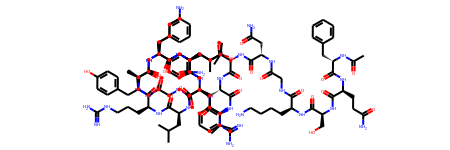

In [5]:
Chem.MolFromSmiles(molecules.loc[4, "Smiles"])

## EDA

Inspect and clean the full dataset. The goal is to end up with a *representative set* of drug-like molecules that fall within certain bounds in order to be useful for drug discovery projects.

In [6]:
molecules.describe()

,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,HBA,HBD,#RO5 Violations,#Rotatable Bonds,QED Weighted,CX ApKa,CX BpKa,CX LogP,CX LogD,Aromatic Rings,Inorganic Flag,Heavy Atoms,HBA Lipinski,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic)
count,1.961457e+06,1.944921e+06,1.865149e+06,1.865149e+06,1.895465e+06,1.895465e+06,1.895465e+06,1.895465e+06,1.895465e+06,1.895465e+06,1.895465e+06,1.093503e+06,1.208215e+06,1.895245e+06,1.895245e+06,1.895465e+06,1.961457e+06,1.895465e+06,1.895465e+06,1.895465e+06,1.895465e+06,1.944908e+06
mean,1.287206e-02,4.334191e+02,5.836754e+00,8.613782e+00,3.486932e+00,8.227064e+01,5.253101e+00,1.608337e+00,4.133149e-01,5.794883e+00,5.452706e-01,9.139420e+00,5.590716e+00,3.146201e+00,2.490231e+00,2.463846e+00,-9.913625e-01,2.848047e+01,6.294962e+00,1.769215e+00,4.633433e-01,4.289850e+02
std,2.078291e-01,2.551495e+02,1.374638e+01,4.533009e+01,1.905032e+00,4.414831e+01,2.414166e+00,1.567488e+00,7.241692e-01,3.809391e+00,2.200944e-01,3.745391e+00,3.203295e+00,2.170068e+00,2.523409e+00,1.230736e+00,9.358210e-02,8.857930e+00,2.896990e+00,1.821456e+00,8.002276e-01,2.535953e+02
min,0.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,-1.426000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,-1.961000e+01,0.000000e+00,-2.095000e+01,-2.999000e+01,0.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.002600e+00
25%,0.000000e+00,3.264300e+02,1.000000e+00,2.000000e+00,2.370000e+00,5.456000e+01,4.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,3.800000e-01,6.730000e+00,2.800000e+00,1.970000e+00,1.270000e+00,2.000000e+00,-1.000000e+00,2.300000e+01,4.000000e+00,1.000000e+00,0.000000e+00,3.240102e+02
50%,0.000000e+00,3.953000e+02,3.000000e+00,4.000000e+00,3.470000e+00,7.560000e+01,5.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,5.600000e-01,9.940000e+00,5.580000e+00,3.210000e+00,2.710000e+00,2.000000e+00,-1.000000e+00,2.700000e+01,6.000000e+00,1.000000e+00,0.000000e+00,3.911522e+02
75%,0.000000e+00,4.759300e+02,5.000000e+00,8.000000e+00,4.610000e+00,1.003300e+02,6.000000e+00,2.000000e+00,1.000000e+00,7.000000e+00,7.300000e-01,1.227000e+01,8.400000e+00,4.440000e+00,4.000000e+00,3.000000e+00,-1.000000e+00,3.300000e+01,8.000000e+00,2.000000e+00,1.000000e+00,4.712270e+02
max,4.000000e+00,1.302049e+04,1.292000e+03,1.649500e+04,2.257000e+01,5.952200e+02,3.200000e+01,2.500000e+01,4.000000e+00,6.700000e+01,9.500000e-01,1.400000e+01,6.190000e+01,2.488000e+01,2.299000e+01,3.000000e+01,1.000000e+00,7.900000e+01,3.500000e+01,3.200000e+01,4.000000e+00,1.301203e+04


In [ ]:
# plotting functions